# Исследование объявлений о продаже квартир
## Задачи исследования

### Этап 1: Загрузить, изучить и визуализировать данные 
Загрузим данные из файла в датафрейм.
Изучим общую информацию о полученном датафрейме.
Построим общую гистограмму для всех числовых столбцов таблицы.

### Этап 2: Предобработка данных
Найдем и изучим пропущенные значения в столбцах.
Заполним пропущенные значения, где это возможно.
Изменим тип данных в выбранных столбцах.
Устраним неявные дубликаты в столбце с названиями населённых пунктов.
Устраним редкие и выбивающиеся значения.

### Этап 3: Добавление новых столбцов
Добавим столбцы с параметрами: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

### Этап 4: Исследовательский анализ данных
Исследуем параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.
Построим гистограммы для каждого из этих параметров и описывайте наблюдения.

### Этап 5: Общий вывод
Выведем полученные результаты и основные выводы проведённого исследования.

### Описание данных:

- locality_name — название населённого пункта
- cityCenters_nearest — расстояние до центра города (м)
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- floor — этаж
- rooms — число комнат
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- balcony — число балконов
- is_apartment — апартаменты (булев тип)
- total_images — число фотографий квартиры в объявлении
- first_day_exposition — дата публикации
- last_price — цена на момент снятия с публикации
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

# Этап 1. Импортируем библиотеки, получим и изучим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    dataframe = pd.read_csv('/Users/Edward/Code/DS+/csv/real_estate_data.csv', sep = '\t')
except:
    dataframe = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
dataframe.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


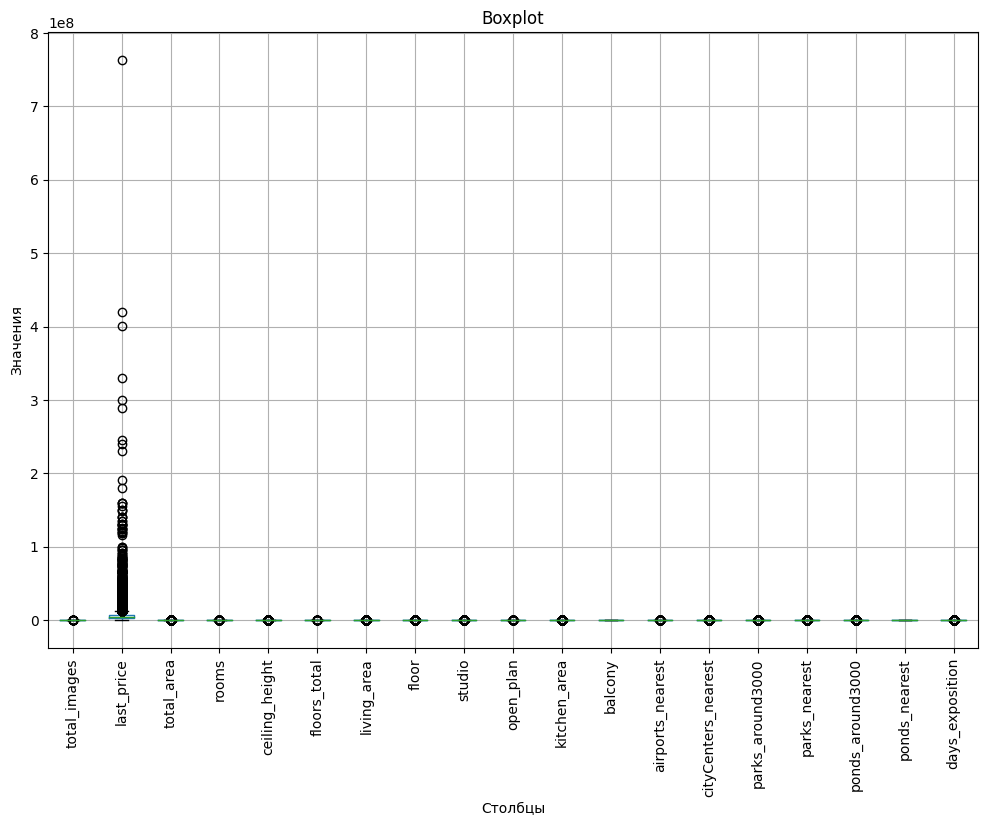

In [5]:
# Создание boxplot для всех столбцов датафрейма
dataframe.boxplot(figsize=(12, 8))

# Настройка осей и заголовка
plt.xticks(rotation=90)  # Поворот названий столбцов по оси X, если нужно
plt.xlabel('Столбцы')    # Название оси X
plt.ylabel('Значения')   # Название оси Y
plt.title('Boxplot')     # Заголовок графика

# Отображение графика
plt.show()

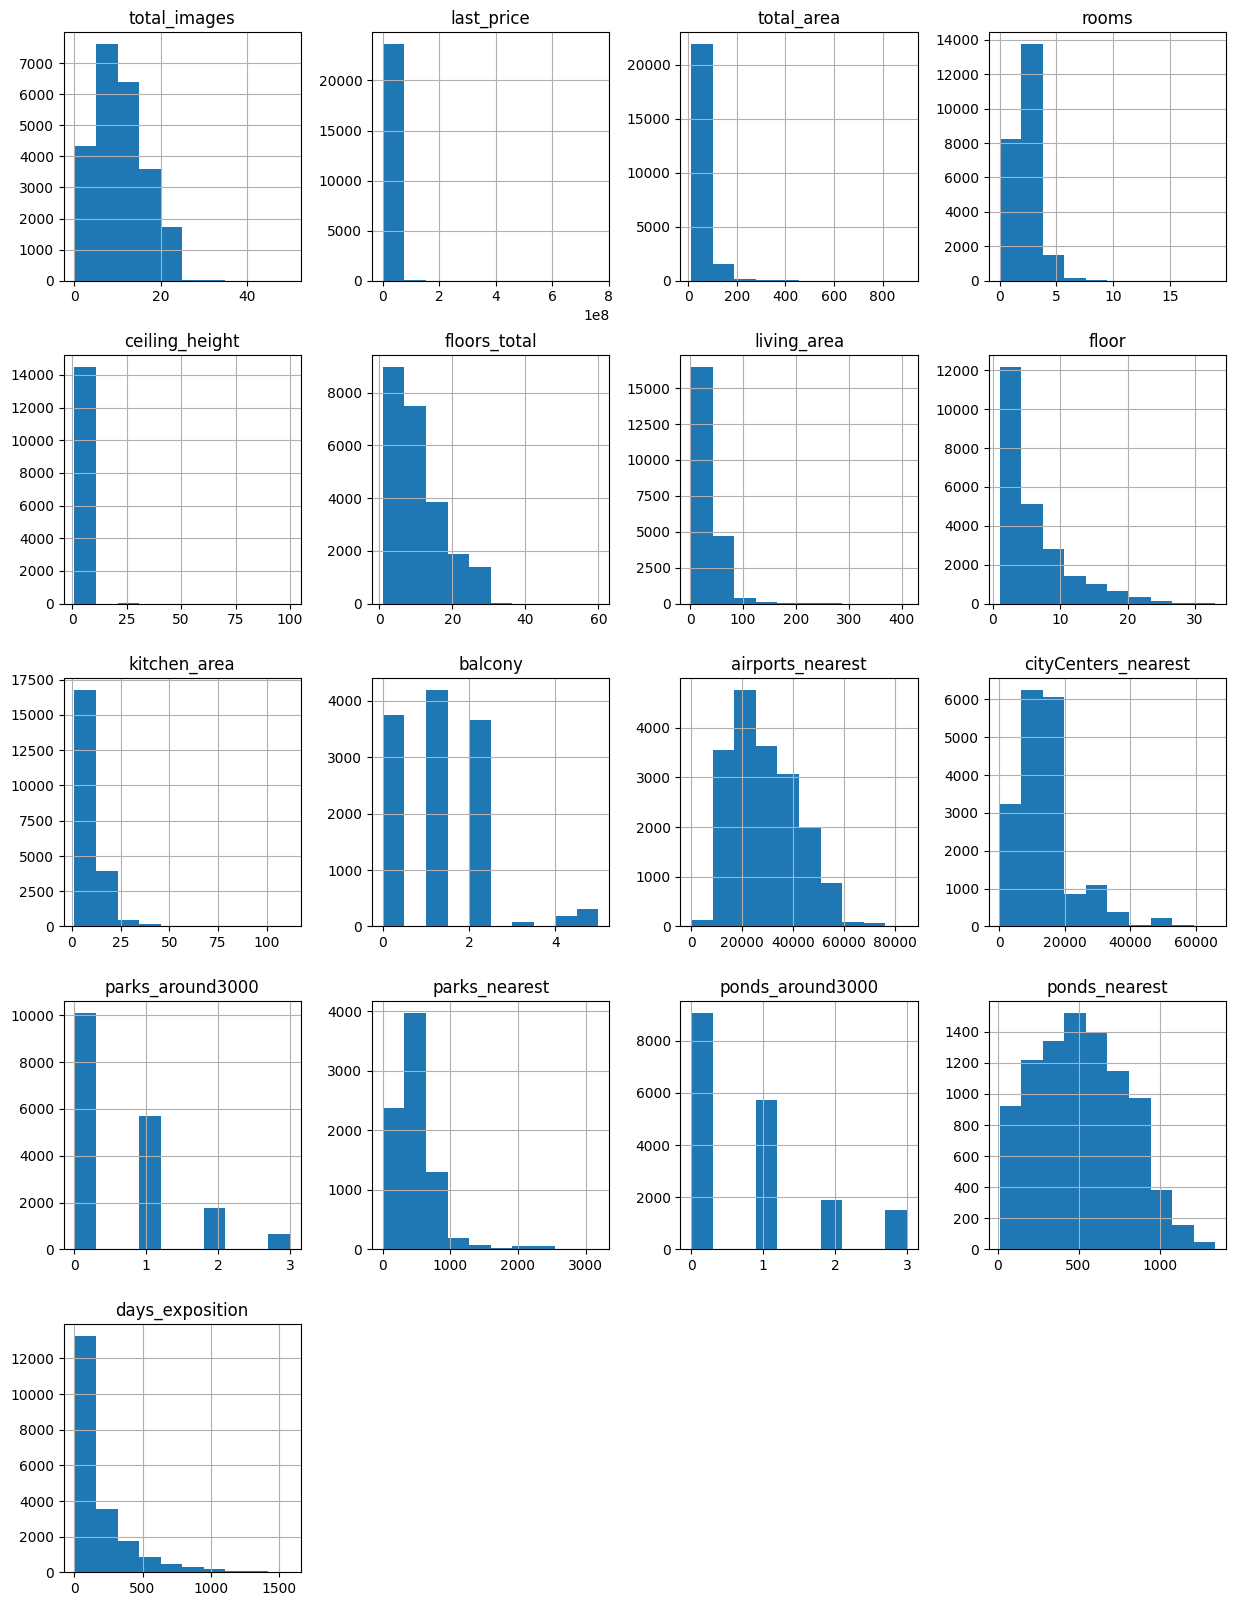

In [6]:
dataframe.hist(figsize = (15, 20))
plt.show()

Для более детального первичного анализа

In [7]:
# def plot_boxplots(dataframe):
#     """
#     Построение диаграмм размаха (box plots) для каждого числового столбца в DataFrame.

#     Параметры:
#         dataframe (pandas.DataFrame): DataFrame, для которого нужно построить диаграммы размаха.

#     Возвращаемое значение:
#         None
#     """

#     # Получение списка числовых столбцов
#     numeric_columns = dataframe.select_dtypes(include='number').columns

#     # Построение диаграмм размаха для каждого числового столбца
#     for column in numeric_columns:
#         # Создание нового окна для каждой диаграммы
#         plt.figure()

#         # Построение диаграммы размаха
#         dataframe.boxplot(column=column)

#         # Задание заголовка диаграммы
#         plt.title(f'Box plot for {column}')

# # Отображение диаграммы размаха
# plot_boxplots(dataframe)

# Вывод
Проблемы, которые нужно решить и понять: 
1) много пропущенных значений;
2) столбцы не соответствуют удобному и единообразному правила названия;
3) прыгающий регистр в названии столбцов;
4) некорректные типы данных;
5) нелогичная группировка столбцов между собой;
6) много выбросов (надо понять их природу и устранить если требуется).

# Этап 2. Предобработка данных

Сразу исправим пункт №5, а то мой аутизм не позволяет мне двигаться дальше и заодно пункт №2

In [8]:
def reorder_columns(dataframe):
    """
    Переставляет столбцы в DataFrame в определенной последовательности.

    Параметры:
        dataframe (pandas.DataFrame): DataFrame, для которого нужно переставить столбцы.

    Возвращаемое значение:
        pandas.DataFrame: DataFrame с переставленными столбцами.
    """

    # Определение новой последовательности столбцов
    column_sequence = [
        'locality_name',
        'cityCenters_nearest',
        'airports_nearest',
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
        'total_area',
        'living_area',
        'kitchen_area',
        'ceiling_height',
        'floors_total',
        'floor',
        'rooms',
        'studio',
        'open_plan',
        'balcony',
        'is_apartment',
        'total_images',
        'first_day_exposition',
        'last_price',
        'days_exposition'
    ]

    # Определение новых названий столбцов
    column_names = [
        'locality_name',
        'city_centers_nearest_m',
        'airports_nearest_m',
        'parks_around_3km',
        'parks_nearest_m',
        'ponds_around_3km',
        'ponds_nearest_m',
        'total_area_m2',
        'living_area_m2',
        'kitchen_area_m2',
        'ceiling_height_m',
        'floors_total',
        'floor',
        'rooms',
        'studio',
        'open_plan',
        'balcony',
        'is_apartment',
        'total_images',
        'first_day_exposition',
        'last_price',
        'days_exposition'
    ]


    # Переупорядочивание столбцов в DataFrame
    dataframe = dataframe[column_sequence]
    # Переименование столбцов в DataFrame
    dataframe = dataframe.set_axis(column_names, axis = 'columns')
    return dataframe

dataframe = reorder_columns(dataframe)
dataframe.head()

,locality_name,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,total_area_m2,living_area_m2,kitchen_area_m2,...,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition
0,Санкт-Петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,108.0,51.0,25.0,...,8,3,False,False,NaN,NaN,20,2019-03-07T00:00:00,13000000.0,NaN
1,посёлок Шушары,18603.0,12817.0,0.0,NaN,0.0,NaN,40.4,18.6,11.0,...,1,1,False,False,2.0,NaN,7,2018-12-04T00:00:00,3350000.0,81.0
2,Санкт-Петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,56.0,34.3,8.3,...,4,2,False,False,0.0,NaN,10,2015-08-20T00:00:00,5196000.0,558.0
3,Санкт-Петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,159.0,NaN,NaN,...,9,3,False,False,0.0,NaN,0,2015-07-24T00:00:00,64900000.0,424.0
4,Санкт-Петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,100.0,32.0,41.0,...,13,2,False,False,NaN,NaN,2,2018-06-19T00:00:00,10000000.0,121.0


Изменим тип данных, пункт №4

In [9]:
# Приводим колонки к типу datetime
dataframe['first_day_exposition'] = pd.to_datetime(dataframe['first_day_exposition'])
# Приводим колонки к типу int
dataframe['floors_total'] = dataframe['floors_total'].astype(pd.Int64Dtype(), errors='ignore')
# Приводим колонки к типу int
dataframe['balcony'] = dataframe['balcony'].astype(pd.Int64Dtype(), errors='ignore')

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   locality_name           23650 non-null  object        
 1   city_centers_nearest_m  18180 non-null  float64       
 2   airports_nearest_m      18157 non-null  float64       
 3   parks_around_3km        18181 non-null  float64       
 4   parks_nearest_m         8079 non-null   float64       
 5   ponds_around_3km        18181 non-null  float64       
 6   ponds_nearest_m         9110 non-null   float64       
 7   total_area_m2           23699 non-null  float64       
 8   living_area_m2          21796 non-null  float64       
 9   kitchen_area_m2         21421 non-null  float64       
 10  ceiling_height_m        14504 non-null  float64       
 11  floors_total            23613 non-null  Int64         
 12  floor                   23699 non-null  int64 

Чекним дубликаты

In [11]:
dataframe.duplicated().sum()

0

Поработает с пропущенными значениями, пункт №1

In [12]:
dataframe.isnull().sum().sort_values()

first_day_exposition          0
total_images                  0
open_plan                     0
studio                        0
rooms                         0
floor                         0
total_area_m2                 0
last_price                    0
locality_name                49
floors_total                 86
living_area_m2             1903
kitchen_area_m2            2278
days_exposition            3181
ponds_around_3km           5518
parks_around_3km           5518
city_centers_nearest_m     5519
airports_nearest_m         5542
ceiling_height_m           9195
balcony                   11519
ponds_nearest_m           14589
parks_nearest_m           15620
is_apartment              20924
dtype: int64

In [13]:
# Посмотрим теперь в процентах
dataframe.isnull().sum().sort_values()/dataframe.shape[0]*100

first_day_exposition       0.000000
total_images               0.000000
open_plan                  0.000000
studio                     0.000000
rooms                      0.000000
floor                      0.000000
total_area_m2              0.000000
last_price                 0.000000
locality_name              0.206760
floors_total               0.362885
living_area_m2             8.029875
kitchen_area_m2            9.612220
days_exposition           13.422507
ponds_around_3km          23.283683
parks_around_3km          23.283683
city_centers_nearest_m    23.287902
airports_nearest_m        23.384953
ceiling_height_m          38.799105
balcony                   48.605426
ponds_nearest_m           61.559559
parks_nearest_m           65.909954
is_apartment              88.290645
dtype: float64

По порядку будем ковыряться в столбцах

In [14]:
# Узнаем колличество уникальных населенных пунктов
len(dataframe['locality_name'].unique())

365

In [15]:
dataframe['locality_name'] = dataframe['locality_name'].str.lower()

In [16]:
# Не помогло
len(dataframe['locality_name'].unique())

365

In [17]:
dataframe['locality_name'] = dataframe['locality_name'].str.replace('ё', 'е', regex=True)

In [18]:
# Отично, минус 34 дубля
len(dataframe['locality_name'].unique())

331

In [19]:
dataframe['locality_name'].isnull().sum()

49

In [20]:
# Удалим строки без города, они будут мешать в анализе
dataframe = dataframe.dropna(subset=['locality_name'])

In [21]:
dataframe['locality_name'].isnull().sum()

0

In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   locality_name           23650 non-null  object        
 1   city_centers_nearest_m  18139 non-null  float64       
 2   airports_nearest_m      18116 non-null  float64       
 3   parks_around_3km        18140 non-null  float64       
 4   parks_nearest_m         8064 non-null   float64       
 5   ponds_around_3km        18140 non-null  float64       
 6   ponds_nearest_m         9085 non-null   float64       
 7   total_area_m2           23650 non-null  float64       
 8   living_area_m2          21752 non-null  float64       
 9   kitchen_area_m2         21381 non-null  float64       
 10  ceiling_height_m        14490 non-null  float64       
 11  floors_total            23565 non-null  Int64         
 12  floor                   23650 non-null  int64 

Значения в столбцах 'parks_nearest_m' и 'ponds_nearest_m' одинаковы и зависят от значений 'parks_around_3km' и 'ponds_around_3km',
так как если парка или пруда нет в радиусе 3км, то и его не будет в радиусе нескольких сотен метров, поэтому почистим пропуски. Не будем полность ставить везде нули в этих столбцах,так как не известно есть или нет парк-пруд.

In [23]:
dataframe.head(20)

,locality_name,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,total_area_m2,living_area_m2,kitchen_area_m2,...,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition
0,санкт-петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,108.00,51.00,25.00,...,8,3,False,False,<NA>,NaN,20,2019-03-07,13000000.0,NaN
1,поселок шушары,18603.0,12817.0,0.0,NaN,0.0,NaN,40.40,18.60,11.00,...,1,1,False,False,2,NaN,7,2018-12-04,3350000.0,81.0
2,санкт-петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,56.00,34.30,8.30,...,4,2,False,False,0,NaN,10,2015-08-20,5196000.0,558.0
3,санкт-петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,159.00,NaN,NaN,...,9,3,False,False,0,NaN,0,2015-07-24,64900000.0,424.0
4,санкт-петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,100.00,32.00,41.00,...,13,2,False,False,<NA>,NaN,2,2018-06-19,10000000.0,121.0
5,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,30.40,14.40,9.10,...,5,1,False,False,<NA>,NaN,10,2018-09-10,2890000.0,55.0
6,поселок парголово,19143.0,52996.0,0.0,NaN,0.0,NaN,37.30,10.60,14.40,...,6,1,False,False,1,NaN,6,2017-11-02,3700000.0,155.0
7,санкт-петербург,11634.0,23982.0,0.0,NaN,0.0,NaN,71.60,NaN,18.90,...,22,2,False,False,2,NaN,5,2019-04-18,7915000.0,NaN
8,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,33.16,15.43,8.81,...,26,1,False,False,<NA>,NaN,20,2018-05-23,2900000.0,189.0
9,санкт-петербург,15008.0,50898.0,0.0,NaN,0.0,NaN,61.00,43.60,6.50,...,7,3,False,False,2,NaN,18,2017-02-26,5400000.0,289.0


In [24]:
def replace_zero_with_nan(dataframe):
    """
    Заменяет значения в столбце 'parks_nearest_m' и 'ponds_nearest_m' на ноль, 
    если значения в столбцах 'parks_around_3km' и 'ponds_around_3km' равны нулю.

    Аргументы:
        df (pandas.DataFrame): Входной DataFrame.

    Возвращает:
        pandas.DataFrame: Обновленный DataFrame с замененными значениями.

    """

    # Устанавливаем значение ноль в столбце'parks_nearest_m' и 'ponds_nearest_m', если 'parks_around_3km' и 'ponds_around_3km' равны нулю
    dataframe.loc[(dataframe['parks_around_3km'] == 0) & (dataframe['ponds_around_3km'] == 0), ['parks_nearest_m', 'ponds_nearest_m']] = 0

    return dataframe

replace_zero_with_nan(dataframe)

dataframe.head()

,locality_name,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,total_area_m2,living_area_m2,kitchen_area_m2,...,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition
0,санкт-петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,108.0,51.0,25.0,...,8,3,False,False,<NA>,NaN,20,2019-03-07,13000000.0,NaN
1,поселок шушары,18603.0,12817.0,0.0,0.0,0.0,0.0,40.4,18.6,11.0,...,1,1,False,False,2,NaN,7,2018-12-04,3350000.0,81.0
2,санкт-петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,56.0,34.3,8.3,...,4,2,False,False,0,NaN,10,2015-08-20,5196000.0,558.0
3,санкт-петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,159.0,NaN,NaN,...,9,3,False,False,0,NaN,0,2015-07-24,64900000.0,424.0
4,санкт-петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,100.0,32.0,41.0,...,13,2,False,False,<NA>,NaN,2,2018-06-19,10000000.0,121.0


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   locality_name           23650 non-null  object        
 1   city_centers_nearest_m  18139 non-null  float64       
 2   airports_nearest_m      18116 non-null  float64       
 3   parks_around_3km        18140 non-null  float64       
 4   parks_nearest_m         13870 non-null  float64       
 5   ponds_around_3km        18140 non-null  float64       
 6   ponds_nearest_m         14891 non-null  float64       
 7   total_area_m2           23650 non-null  float64       
 8   living_area_m2          21752 non-null  float64       
 9   kitchen_area_m2         21381 non-null  float64       
 10  ceiling_height_m        14490 non-null  float64       
 11  floors_total            23565 non-null  Int64         
 12  floor                   23650 non-null  int64 

В результате выполнения следующих действий мы преобразуем единицы измерения и удалим ненужные столбцы, что может улучшить обработку данных и сделать DataFrame более удобным для анализа.

In [26]:
# Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам
dataframe['city_centers_nearest_km'] = (dataframe['city_centers_nearest_m'] / 1000)
dataframe['airports_nearest_km'] = dataframe['airports_nearest_m'] / 1000
dataframe['parks_nearest_km'] = dataframe['parks_nearest_m'] / 1000
dataframe['ponds_nearest_km'] = dataframe['ponds_nearest_m'] / 1000

# Присваиваем значениям NaN в 'parks_nearest_km' значения из 'parks_around_3km'
dataframe['parks_nearest_km'].fillna(dataframe['parks_around_3km'], inplace=True)

# Присваиваем значениям NaN в 'ponds_nearest_km' значения из 'ponds_around_3km'
dataframe['ponds_nearest_km'].fillna(dataframe['ponds_around_3km'], inplace=True)
#del [dataframe['city_centers_nearest_m'], dataframe['airports_nearest_m'], dataframe['parks_nearest_m'],dataframe['ponds_nearest_m'] ]

# # Удаление столбцов
columns_to_drop = ['city_centers_nearest_m', 
                   'airports_nearest_m', 
                   'parks_nearest_m',
                   'ponds_nearest_m', 
                   'parks_around_3km', 
                   'ponds_around_3km']

dataframe.drop(columns_to_drop, axis=1, inplace=True)

# Вывод обновленного DataFrame
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition,city_centers_nearest_km,airports_nearest_km,parks_nearest_km,ponds_nearest_km
0,санкт-петербург,108.0,51.0,25.0,2.70,16,8,3,False,False,<NA>,NaN,20,2019-03-07,13000000.0,NaN,16.028,18.863,0.482,0.755
1,поселок шушары,40.4,18.6,11.0,NaN,11,1,1,False,False,2,NaN,7,2018-12-04,3350000.0,81.0,18.603,12.817,0.000,0.000
2,санкт-петербург,56.0,34.3,8.3,NaN,5,4,2,False,False,0,NaN,10,2015-08-20,5196000.0,558.0,13.933,21.741,0.090,0.574
3,санкт-петербург,159.0,NaN,NaN,NaN,14,9,3,False,False,0,NaN,0,2015-07-24,64900000.0,424.0,6.800,28.098,0.084,0.234
4,санкт-петербург,100.0,32.0,41.0,3.03,14,13,2,False,False,<NA>,NaN,2,2018-06-19,10000000.0,121.0,8.098,31.856,0.112,0.048


In [27]:
dataframe.columns.tolist()

['locality_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'floors_total',
 'floor',
 'rooms',
 'studio',
 'open_plan',
 'balcony',
 'is_apartment',
 'total_images',
 'first_day_exposition',
 'last_price',
 'days_exposition',
 'city_centers_nearest_km',
 'airports_nearest_km',
 'parks_nearest_km',
 'ponds_nearest_km']

Поменяем логику столбцов на более человечную: где, что, почем, когда и все о парках, водоемах и аэропортах.

In [28]:
def final_reorder_columns(dataframe):
    """
    Переставляет столбцы в DataFrame в определенной последовательности.

    Параметры:
        dataframe (pandas.DataFrame): DataFrame, для которого нужно переставить столбцы.

    Возвращаемое значение:
        pandas.DataFrame: DataFrame с переставленными столбцами.
    """

    # Определение новой последовательности столбцов
    final_columns_order = ['locality_name',
                     'total_area_m2',
                     'living_area_m2',
                     'kitchen_area_m2',
                     'ceiling_height_m',
                     'floors_total',
                     'floor',
                     'rooms',
                     'studio',
                     'open_plan',
                     'balcony',
                     'is_apartment',
                     'total_images',
                     'first_day_exposition',
                     'last_price',
                     'days_exposition',
                     'parks_nearest_km',
                     'ponds_nearest_km',
                     'city_centers_nearest_km',
                     'airports_nearest_km']


    # Переупорядочивание столбцов в DataFrame
    dataframe = dataframe[final_columns_order]
    return dataframe

dataframe = final_reorder_columns(dataframe)
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
0,санкт-петербург,108.0,51.0,25.0,2.70,16,8,3,False,False,<NA>,NaN,20,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863
1,поселок шушары,40.4,18.6,11.0,NaN,11,1,1,False,False,2,NaN,7,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817
2,санкт-петербург,56.0,34.3,8.3,NaN,5,4,2,False,False,0,NaN,10,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741
3,санкт-петербург,159.0,NaN,NaN,NaN,14,9,3,False,False,0,NaN,0,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098
4,санкт-петербург,100.0,32.0,41.0,3.03,14,13,2,False,False,<NA>,NaN,2,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   locality_name            23650 non-null  object        
 1   total_area_m2            23650 non-null  float64       
 2   living_area_m2           21752 non-null  float64       
 3   kitchen_area_m2          21381 non-null  float64       
 4   ceiling_height_m         14490 non-null  float64       
 5   floors_total             23565 non-null  Int64         
 6   floor                    23650 non-null  int64         
 7   rooms                    23650 non-null  int64         
 8   studio                   23650 non-null  bool          
 9   open_plan                23650 non-null  bool          
 10  balcony                  12137 non-null  Int64         
 11  is_apartment             2760 non-null   object        
 12  total_images             23650 n

In [30]:
dataframe.isnull().sum().sort_values()/dataframe.shape[0]*100

locality_name               0.000000
last_price                  0.000000
first_day_exposition        0.000000
total_images                0.000000
studio                      0.000000
rooms                       0.000000
open_plan                   0.000000
total_area_m2               0.000000
floor                       0.000000
floors_total                0.359408
living_area_m2              8.025370
kitchen_area_m2             9.594080
days_exposition            13.446089
parks_nearest_km           23.298097
ponds_nearest_km           23.298097
city_centers_nearest_km    23.302326
airports_nearest_km        23.399577
ceiling_height_m           38.731501
balcony                    48.680761
is_apartment               88.329810
dtype: float64

In [31]:
# Если балкона нет, то его нет...
dataframe['balcony'].fillna(value=0, inplace=True)
dataframe.isnull().sum().sort_values()/dataframe.shape[0]*100


locality_name               0.000000
last_price                  0.000000
first_day_exposition        0.000000
total_images                0.000000
balcony                     0.000000
studio                      0.000000
rooms                       0.000000
open_plan                   0.000000
total_area_m2               0.000000
floor                       0.000000
floors_total                0.359408
living_area_m2              8.025370
kitchen_area_m2             9.594080
days_exposition            13.446089
parks_nearest_km           23.298097
ponds_nearest_km           23.298097
city_centers_nearest_km    23.302326
airports_nearest_km        23.399577
ceiling_height_m           38.731501
is_apartment               88.329810
dtype: float64

In [32]:
dataframe.head(20)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
0,санкт-петербург,108.00,51.00,25.00,2.70,16,8,3,False,False,0,NaN,20,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863
1,поселок шушары,40.40,18.60,11.00,NaN,11,1,1,False,False,2,NaN,7,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817
2,санкт-петербург,56.00,34.30,8.30,NaN,5,4,2,False,False,0,NaN,10,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741
3,санкт-петербург,159.00,NaN,NaN,NaN,14,9,3,False,False,0,NaN,0,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098
4,санкт-петербург,100.00,32.00,41.00,3.03,14,13,2,False,False,0,NaN,2,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856
5,городской поселок янино-1,30.40,14.40,9.10,NaN,12,5,1,False,False,0,NaN,10,2018-09-10,2890000.0,55.0,NaN,NaN,NaN,NaN
6,поселок парголово,37.30,10.60,14.40,NaN,26,6,1,False,False,1,NaN,6,2017-11-02,3700000.0,155.0,0.000,0.000,19.143,52.996
7,санкт-петербург,71.60,NaN,18.90,NaN,24,22,2,False,False,2,NaN,5,2019-04-18,7915000.0,NaN,0.000,0.000,11.634,23.982
8,поселок мурино,33.16,15.43,8.81,NaN,27,26,1,False,False,0,NaN,20,2018-05-23,2900000.0,189.0,NaN,NaN,NaN,NaN
9,санкт-петербург,61.00,43.60,6.50,2.50,9,7,3,False,False,2,NaN,18,2017-02-26,5400000.0,289.0,0.000,0.000,15.008,50.898


Если есть значения в "living_area_m2", то "is_apartment" по дефолту становится False, так как аппартаменты являются не жилым помещением

In [33]:
dataframe.loc[dataframe['living_area_m2'].notnull(), 'is_apartment'] = False


Если значение в "is_apartment" = True, то "living_area_m2" по дефолту становится 0, так как аппартаменты не являются жилым помещением

In [34]:
dataframe.loc[dataframe['is_apartment'] == True, 'living_area_m2'] = 0

Доля пропусков в 'floors_total' менее 5%, так что просто удалим для экономии времени

In [35]:
dataframe.dropna(subset=['floors_total'], inplace=True)

In [36]:
dataframe.isnull().sum().sort_values()/dataframe.shape[0]*100

locality_name               0.000000
last_price                  0.000000
first_day_exposition        0.000000
total_images                0.000000
balcony                     0.000000
studio                      0.000000
rooms                       0.000000
open_plan                   0.000000
floors_total                0.000000
total_area_m2               0.000000
floor                       0.000000
is_apartment                7.413537
living_area_m2              7.880331
kitchen_area_m2             9.429238
days_exposition            13.456397
parks_nearest_km           23.339699
ponds_nearest_km           23.339699
city_centers_nearest_km    23.343942
airports_nearest_km        23.441545
ceiling_height_m           38.548695
dtype: float64

Все что меньше 10% нас не беспокоит, на анализе это не сильно отразится.

- days_exposition            13.44 - скорее всего это объявления, которые еще имеют активный статус, поэтому в датасете указано NaN;

- parks/ponds                23.29 - parks и ponds имеют одинаковые значения, скорее всего это связано с тем, что людям просто лень гуглить есть ли парки-пруды и узнавать до них расстояние, поэтому они просто скипают;

- city_centers_nearest_km    23.30
- airports_nearest_km        23.39  
- ceiling_height_m           38.73   

Последние три пункта (city_centers_nearest_km, airports_nearest_km, ceiling_height_m) чистить не имеет смысла, поскольку это может исказить данные. В дальнейшем дадим рекомендации для сервиса сделать обязательным заполнение ячеек в профиле и автоматизировать эти процессы.

In [37]:
dataframe.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,balcony,total_images,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
count,23565.000000,21708.000000,21343.000000,14481.000000,23565.0,23565.000000,23565.000000,23565.0,23565.000000,2.356500e+04,20394.000000,18065.000000,18065.000000,18064.000000,18041.000000
mean,60.322824,34.442124,10.560994,2.771283,10.675875,5.878124,2.070656,0.593677,9.878421,6.540058e+06,180.741395,0.218066,0.259245,14.192656,28.797083
std,35.657060,22.051215,5.900630,1.261983,6.594823,4.871485,1.078591,0.96066,5.681156,1.091093e+07,219.732782,0.333597,0.325296,8.613348,12.632500
min,12.000000,0.000000,1.300000,1.000000,1.0,1.000000,0.000000,0.0,0.000000,1.219000e+04,1.000000,0.000000,0.000000,0.181000,0.000000
25%,40.000000,18.600000,7.000000,2.510000,5.0,2.000000,1.000000,0.0,6.000000,3.400000e+06,45.000000,0.000000,0.000000,9.238000,18.565000
50%,52.000000,30.000000,9.100000,2.650000,9.0,4.000000,2.000000,0.0,9.000000,4.646000e+06,95.000000,0.000000,0.016000,13.096500,26.757000
75%,69.700000,42.300000,12.000000,2.800000,16.0,8.000000,3.000000,1.0,14.000000,6.790000e+06,231.000000,0.417000,0.503000,16.285000,37.273000
max,900.000000,409.700000,112.000000,100.000000,60.0,33.000000,19.000000,5.0,50.000000,7.630000e+08,1580.000000,3.190000,1.344000,65.968000,84.869000


Для обнаружения аномалий (выбросов) в каждом столбце, можно использовать статистические метрики, такие как среднее значение (mean), стандартное отклонение (std), минимальное значение (min), максимальное значение (max), а также квартили (25%, 50%, 75%).

Взглянув на предоставленные данные, можно заметить следующие потенциальные аномалии:

- В столбце "total_area_m2": максимальное значение составляет 900 м², что кажется необычно для жилой недвижимости.

- В столбце "living_area_m2": максимальное значение составляет 409.7 м², что также кажется необычно.

- В столбце "kitchen_area_m2": максимальное значение составляет 112 м², что может быть аномально.

- В столбце "ceiling_height_m": максимальное значение составляет 100 м, что выглядит слишком высоким для типичных потолков в жилых помещениях.

- В столбце "floors_total":максимальное значение составляет 33 этажа, что может быть выбивающимся значением, если анализируются данные о квартирах.

- В столбце "rooms":  максимальное значение составляет 19 комнат, что может быть необычно для типичных жилых помещений.

- В столбце "last_price": максимальное значение составляет 763 млн, что кажется аномально высоким для большинства недвижимости.

Так что будем фильтровать, это у нас пункт №6 и он же последний.

In [38]:
# Фильтрация и замена аномальных значений
total_area_median = dataframe['total_area_m2'].median()
dataframe['total_area_m2'] = dataframe['total_area_m2'].apply(
    lambda x: x if x <= 500 else total_area_median
)
living_area_median = dataframe['living_area_m2'].median()
dataframe['living_area_m2'] = dataframe['living_area_m2'].apply(
    lambda x: x if x <= 300 else living_area_median
)
kitchen_area_median = dataframe['kitchen_area_m2'].median()
dataframe['kitchen_area_m2'] = dataframe['kitchen_area_m2'].apply(
    lambda x: x if x <= 50 else kitchen_area_median
)
ceiling_height_mean = dataframe['ceiling_height_m'].mean()
dataframe['ceiling_height_m'] = dataframe['ceiling_height_m'].apply(
    lambda x: x if 2 <= x <= 6 else ceiling_height_mean
)
floors_total_median = dataframe['floors_total'].median()
dataframe['floors_total'] = dataframe['floors_total'].apply(
    lambda x: x if pd.isna(x) or x <= 30 else floors_total_median
)
rooms_median = dataframe['rooms'].median()
dataframe['rooms'] = dataframe['rooms'].apply(
    lambda x: x if x <= 10 else rooms_median
)
last_price_mean = dataframe['last_price'].mean()
dataframe['last_price'] = dataframe['last_price'].apply(
    lambda x: x if x <= 500000000 else last_price_mean
)

In [39]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   locality_name            23565 non-null  object        
 1   total_area_m2            23565 non-null  float64       
 2   living_area_m2           23565 non-null  float64       
 3   kitchen_area_m2          23565 non-null  float64       
 4   ceiling_height_m         23565 non-null  float64       
 5   floors_total             23565 non-null  float64       
 6   floor                    23565 non-null  int64         
 7   rooms                    23565 non-null  float64       
 8   studio                   23565 non-null  bool          
 9   open_plan                23565 non-null  bool          
 10  balcony                  23565 non-null  Int64         
 11  is_apartment             21818 non-null  object        
 12  total_images             23565 n

# Вот теперь с этим можно работать

Посмотрим повторно на статистические данные

In [40]:
dataframe.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,balcony,total_images,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.0,23565.000000,2.356500e+04,20394.000000,18065.000000,18065.000000,18064.000000,18041.000000
mean,60.151799,33.997672,10.311806,2.743828,10.638701,5.878124,2.066582,0.593677,9.878421,6.507957e+06,180.741395,0.218066,0.259245,14.192656,28.797083
std,34.226055,20.484841,5.015311,0.219201,6.523842,4.871485,1.054904,0.96066,5.681156,9.734645e+06,219.732782,0.333597,0.325296,8.613348,12.632500
min,12.000000,0.000000,1.300000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.219000e+04,1.000000,0.000000,0.000000,0.181000,0.000000
25%,40.000000,19.000000,7.300000,2.600000,5.000000,2.000000,1.000000,0.0,6.000000,3.400000e+06,45.000000,0.000000,0.000000,9.238000,18.565000
50%,52.000000,30.000000,9.100000,2.771283,9.000000,4.000000,2.000000,0.0,9.000000,4.646000e+06,95.000000,0.000000,0.016000,13.096500,26.757000
75%,69.700000,41.060000,11.400000,2.771283,16.000000,8.000000,3.000000,1.0,14.000000,6.790000e+06,231.000000,0.417000,0.503000,16.285000,37.273000
max,500.000000,300.000000,50.000000,6.000000,29.000000,33.000000,10.000000,5.0,50.000000,4.200000e+08,1580.000000,3.190000,1.344000,65.968000,84.869000


# Этап 3. Добавление в таблицу новых признаков со следующими параметрами:

1) цена одного квадратного метра;
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6) расстояние до центра города в километрах.

In [41]:
dataframe.head(20)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,balcony,is_apartment,total_images,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
0,санкт-петербург,108.00,51.00,25.00,2.700000,16.0,8,3.0,False,False,0,False,20,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863
1,поселок шушары,40.40,18.60,11.00,2.771283,11.0,1,1.0,False,False,2,False,7,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817
2,санкт-петербург,56.00,34.30,8.30,2.771283,5.0,4,2.0,False,False,0,False,10,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741
3,санкт-петербург,159.00,30.00,9.10,2.771283,14.0,9,3.0,False,False,0,NaN,0,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098
4,санкт-петербург,100.00,32.00,41.00,3.030000,14.0,13,2.0,False,False,0,False,2,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856
5,городской поселок янино-1,30.40,14.40,9.10,2.771283,12.0,5,1.0,False,False,0,False,10,2018-09-10,2890000.0,55.0,NaN,NaN,NaN,NaN
6,поселок парголово,37.30,10.60,14.40,2.771283,26.0,6,1.0,False,False,1,False,6,2017-11-02,3700000.0,155.0,0.000,0.000,19.143,52.996
7,санкт-петербург,71.60,30.00,18.90,2.771283,24.0,22,2.0,False,False,2,NaN,5,2019-04-18,7915000.0,NaN,0.000,0.000,11.634,23.982
8,поселок мурино,33.16,15.43,8.81,2.771283,27.0,26,1.0,False,False,0,False,20,2018-05-23,2900000.0,189.0,NaN,NaN,NaN,NaN
9,санкт-петербург,61.00,43.60,6.50,2.500000,9.0,7,3.0,False,False,2,False,18,2017-02-26,5400000.0,289.0,0.000,0.000,15.008,50.898


Начнем добовлять новые признаки, согласно третьему этапу

In [42]:
# Цена одного квадратного метра, пункт №1
dataframe['price_per_meter'] = (dataframe['last_price'] / dataframe['total_area_m2']).round(decimals=2)
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,...,is_apartment,total_images,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km,price_per_meter
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,3.0,False,False,...,False,20,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863,120370.37
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,1.0,False,False,...,False,7,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817,82920.79
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,2.0,False,False,...,False,10,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741,92785.71
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,3.0,False,False,...,NaN,0,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098,408176.10
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,2.0,False,False,...,False,2,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856,100000.00


In [43]:
# День недели публикации объявления, пункт №2
dataframe['first_week_exposition'] = dataframe['first_day_exposition'].dt.day_name()

In [44]:
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,...,total_images,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km,price_per_meter,first_week_exposition
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,3.0,False,False,...,20,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863,120370.37,Thursday
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,1.0,False,False,...,7,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817,82920.79,Tuesday
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,2.0,False,False,...,10,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741,92785.71,Thursday
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,3.0,False,False,...,0,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098,408176.10,Friday
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,2.0,False,False,...,2,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856,100000.00,Tuesday


In [45]:
# Месяц публикации объявления, пункт №3
dataframe['first_month_exposition'] = dataframe['first_day_exposition'].dt.month_name()

In [46]:
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,...,first_day_exposition,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km,price_per_meter,first_week_exposition,first_month_exposition
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,3.0,False,False,...,2019-03-07,13000000.0,NaN,0.482,0.755,16.028,18.863,120370.37,Thursday,March
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,1.0,False,False,...,2018-12-04,3350000.0,81.0,0.000,0.000,18.603,12.817,82920.79,Tuesday,December
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,2.0,False,False,...,2015-08-20,5196000.0,558.0,0.090,0.574,13.933,21.741,92785.71,Thursday,August
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,3.0,False,False,...,2015-07-24,64900000.0,424.0,0.084,0.234,6.800,28.098,408176.10,Friday,July
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,2.0,False,False,...,2018-06-19,10000000.0,121.0,0.112,0.048,8.098,31.856,100000.00,Tuesday,June


In [47]:
# Год публикации объявления, пункт №4
dataframe['first_year_exposition'] = dataframe['first_day_exposition'].dt.year

In [48]:
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,...,last_price,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km,price_per_meter,first_week_exposition,first_month_exposition,first_year_exposition
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,3.0,False,False,...,13000000.0,NaN,0.482,0.755,16.028,18.863,120370.37,Thursday,March,2019
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,1.0,False,False,...,3350000.0,81.0,0.000,0.000,18.603,12.817,82920.79,Tuesday,December,2018
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,2.0,False,False,...,5196000.0,558.0,0.090,0.574,13.933,21.741,92785.71,Thursday,August,2015
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,3.0,False,False,...,64900000.0,424.0,0.084,0.234,6.800,28.098,408176.10,Friday,July,2015
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,2.0,False,False,...,10000000.0,121.0,0.112,0.048,8.098,31.856,100000.00,Tuesday,June,2018


In [49]:
# Добавим тип этажа, пункт №5
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [50]:
dataframe['floor_status'] = dataframe.apply(floor_status, axis=1)

In [51]:
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,studio,open_plan,...,days_exposition,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km,price_per_meter,first_week_exposition,first_month_exposition,first_year_exposition,floor_status
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,3.0,False,False,...,NaN,0.482,0.755,16.028,18.863,120370.37,Thursday,March,2019,другой
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,1.0,False,False,...,81.0,0.000,0.000,18.603,12.817,82920.79,Tuesday,December,2018,первый
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,2.0,False,False,...,558.0,0.090,0.574,13.933,21.741,92785.71,Thursday,August,2015,другой
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,3.0,False,False,...,424.0,0.084,0.234,6.800,28.098,408176.10,Friday,July,2015,другой
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,2.0,False,False,...,121.0,0.112,0.048,8.098,31.856,100000.00,Tuesday,June,2018,другой


In [52]:
dataframe.columns.tolist()

['locality_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'floors_total',
 'floor',
 'rooms',
 'studio',
 'open_plan',
 'balcony',
 'is_apartment',
 'total_images',
 'first_day_exposition',
 'last_price',
 'days_exposition',
 'parks_nearest_km',
 'ponds_nearest_km',
 'city_centers_nearest_km',
 'airports_nearest_km',
 'price_per_meter',
 'first_week_exposition',
 'first_month_exposition',
 'first_year_exposition',
 'floor_status']

In [53]:
new_columns_order = ['locality_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'floors_total',
 'floor',
 'floor_status',
 'rooms',
 'studio',
 'open_plan',
 'balcony',
 'is_apartment',
 'total_images',
 'first_week_exposition',
 'first_month_exposition',
 'first_year_exposition',
 'first_day_exposition',
 'days_exposition',
 'last_price',
 'price_per_meter',
 'parks_nearest_km',
 'ponds_nearest_km',
 'city_centers_nearest_km',
 'airports_nearest_km',]

dataframe = dataframe[new_columns_order]

In [54]:
dataframe.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,floor_status,rooms,studio,...,first_month_exposition,first_year_exposition,first_day_exposition,days_exposition,last_price,price_per_meter,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
0,санкт-петербург,108.0,51.0,25.0,2.700000,16.0,8,другой,3.0,False,...,March,2019,2019-03-07,NaN,13000000.0,120370.37,0.482,0.755,16.028,18.863
1,поселок шушары,40.4,18.6,11.0,2.771283,11.0,1,первый,1.0,False,...,December,2018,2018-12-04,81.0,3350000.0,82920.79,0.000,0.000,18.603,12.817
2,санкт-петербург,56.0,34.3,8.3,2.771283,5.0,4,другой,2.0,False,...,August,2015,2015-08-20,558.0,5196000.0,92785.71,0.090,0.574,13.933,21.741
3,санкт-петербург,159.0,30.0,9.1,2.771283,14.0,9,другой,3.0,False,...,July,2015,2015-07-24,424.0,64900000.0,408176.10,0.084,0.234,6.800,28.098
4,санкт-петербург,100.0,32.0,41.0,3.030000,14.0,13,другой,2.0,False,...,June,2018,2018-06-19,121.0,10000000.0,100000.00,0.112,0.048,8.098,31.856


# Этап 4. Провести исследовательский анализ данных:

1) Изучить следующие параметры объектов: 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройть отдельные гистограммы для каждого из этих параметров. Описать наблюдения по параметрам.

2) Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройть гистограмму;
- Посчитайте среднее и медиану;
- В ячейке типа markdown описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

3) Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
- построить графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией можно использовать сводные таблицы.

4) Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

5) Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

# 4.1. Проведем анализ параметров

In [55]:
dataframe.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floors_total,floor,rooms,balcony,total_images,first_year_exposition,days_exposition,last_price,price_per_meter,parks_nearest_km,ponds_nearest_km,city_centers_nearest_km,airports_nearest_km
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.0,23565.000000,23565.000000,20394.000000,2.356500e+04,2.356500e+04,18065.000000,18065.000000,18064.000000,18041.000000
mean,60.151799,33.997672,10.311806,2.743828,10.638701,5.878124,2.066582,0.593677,9.878421,2017.371016,180.741395,6.507957e+06,1.002290e+05,0.218066,0.259245,14.192656,28.797083
std,34.226055,20.484841,5.015311,0.219201,6.523842,4.871485,1.054904,0.96066,5.681156,1.037393,219.732782,9.734645e+06,8.489608e+04,0.333597,0.325296,8.613348,12.632500
min,12.000000,0.000000,1.300000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,2014.000000,1.000000,1.219000e+04,1.118300e+02,0.000000,0.000000,0.181000,0.000000
25%,40.000000,19.000000,7.300000,2.600000,5.000000,2.000000,1.000000,0.0,6.000000,2017.000000,45.000000,3.400000e+06,7.656250e+04,0.000000,0.000000,9.238000,18.565000
50%,52.000000,30.000000,9.100000,2.771283,9.000000,4.000000,2.000000,0.0,9.000000,2017.000000,95.000000,4.646000e+06,9.500000e+04,0.000000,0.016000,13.096500,26.757000
75%,69.700000,41.060000,11.400000,2.771283,16.000000,8.000000,3.000000,1.0,14.000000,2018.000000,231.000000,6.790000e+06,1.142287e+05,0.417000,0.503000,16.285000,37.273000
max,500.000000,300.000000,50.000000,6.000000,29.000000,33.000000,10.000000,5.0,50.000000,2019.000000,1580.000000,4.200000e+08,8.076923e+06,3.190000,1.344000,65.968000,84.869000


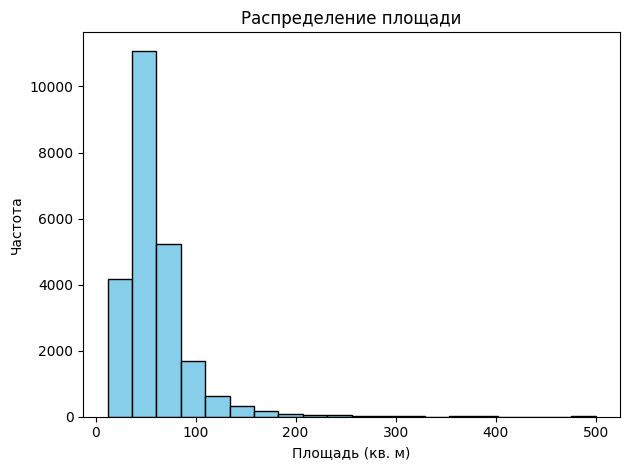

In [56]:
dataframe['total_area_m2'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение площади')
plt.tight_layout()
plt.show()

- Общая площадь (total_area_m2): Распределение имеет положительную скошенность (правостороннее). Большинство квартир имеют площадь до 100 квадратных метров.

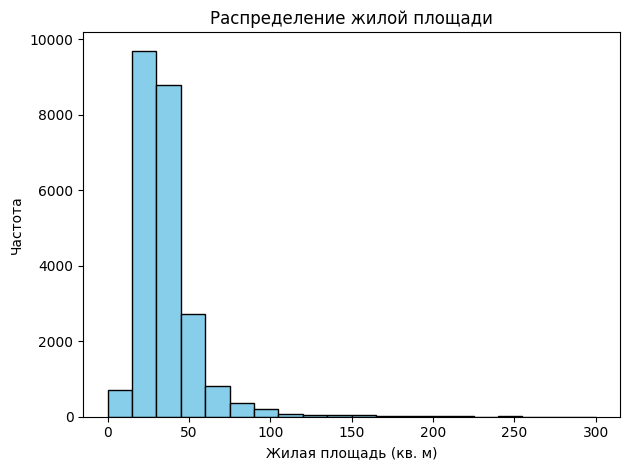

In [57]:
dataframe['living_area_m2'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение жилой площади')
plt.tight_layout()
plt.show()

- Жилая площадь (living_area_m2): Распределение также имеет положительную скошенность. Большинство квартир имеют жилую площадь до 50 квадратных метров.

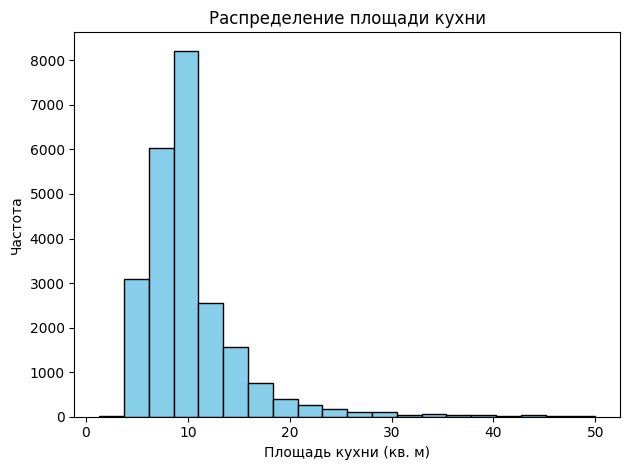

In [58]:
dataframe['kitchen_area_m2'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение площади кухни')
plt.tight_layout()
plt.show()

- Площадь кухни (kitchen_area_m2): Распределение скошено вправо. Большинство квартир имеют площадь кухни до 20 квадратных метров.

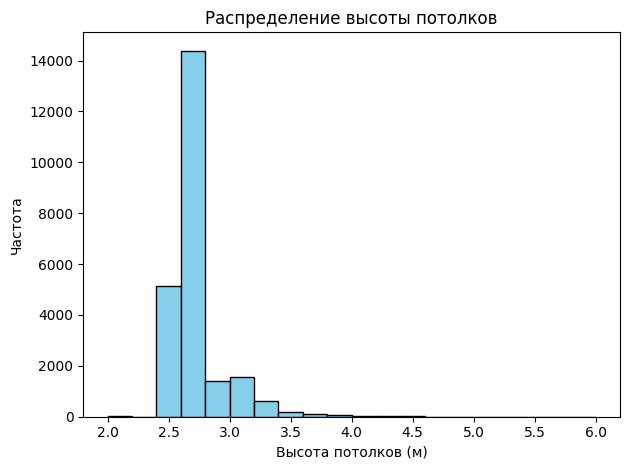

In [59]:
dataframe['ceiling_height_m'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Частота')
plt.title('Распределение высоты потолков')
plt.tight_layout()
plt.show()

- Высота потолков (ceiling_height_m): Распределение имеет пик около значения 2.7 метра, что, вероятно, является стандартной высотой потолков. Однако также есть некоторое количество выбросов с более высокими значениями, возможно, связанными с особенностями некоторых объектов.

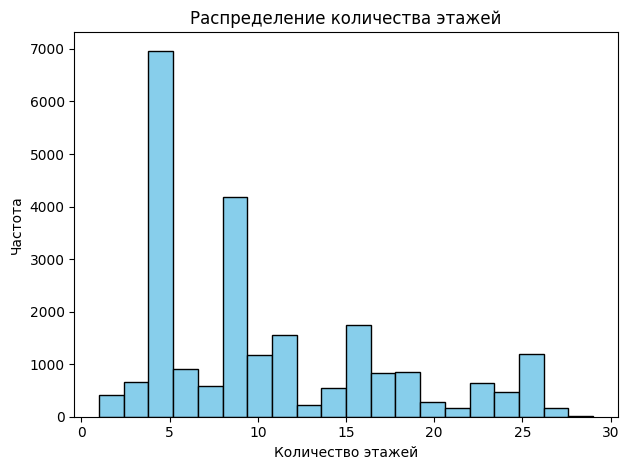

In [60]:
dataframe['floors_total'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.title('Распределение количества этажей')
plt.tight_layout()
plt.show()

- Общее количество этажей в доме (floors_total): Большинство домов имеют до 20 этажей. Наблюдается увеличение числа домов с уменьшением количества этажей.

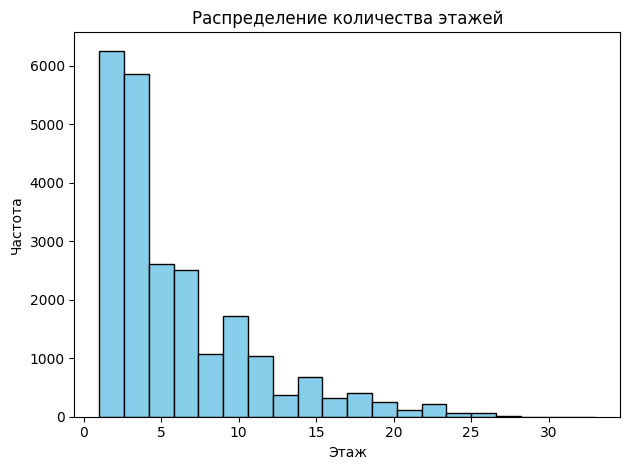

In [61]:
dataframe['floor'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.title('Распределение количества этажей')
plt.tight_layout()
plt.show()

- Этаж квартиры (floor): Большинство квартир находятся на этажах от 1 до 8. Также имеются объявления о продаже квартир на последних этажах.

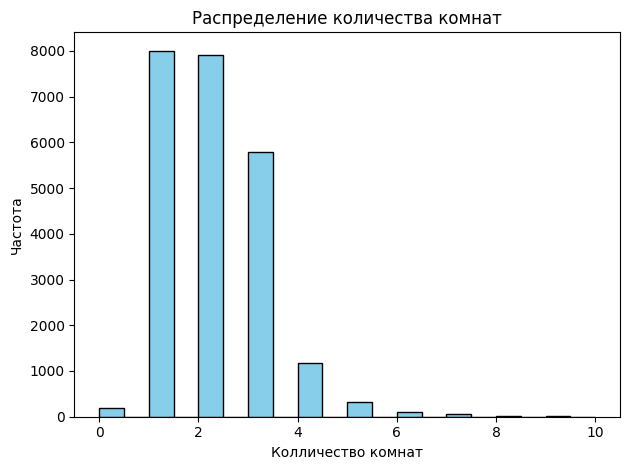

In [62]:
dataframe['rooms'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Колличество комнат')
plt.ylabel('Частота')
plt.title('Распределение количества комнат')
plt.tight_layout()
plt.show()

- Количество комнат (rooms): Распределение показывает, что большинство квартир имеют от 1 до 3 комнат. Наблюдается уменьшение количества квартир с увеличением количества комнат.

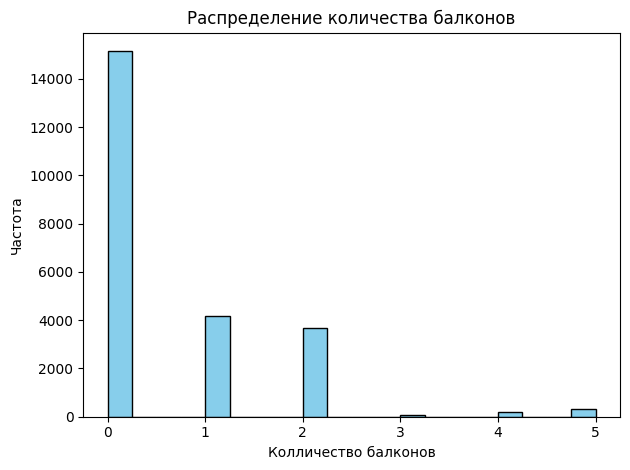

In [63]:
dataframe['balcony'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Колличество балконов')
plt.ylabel('Частота')
plt.title('Распределение количества балконов')
plt.tight_layout()
plt.show()


- Количество балконов (balcony): Большинство квартир не имеют балконов или имеют только один. Есть также квартиры с большим количеством балконов.

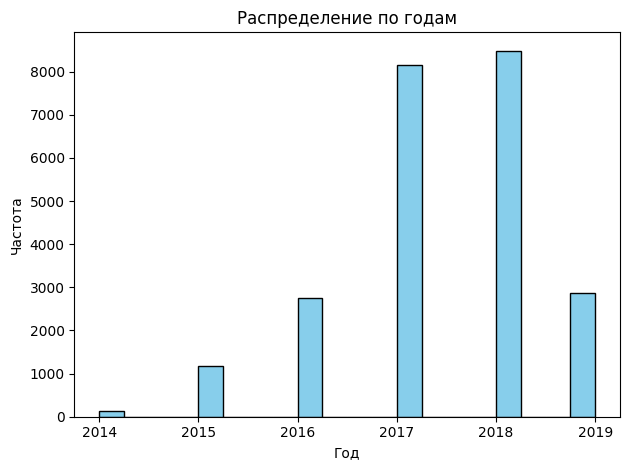

In [64]:
dataframe['first_year_exposition'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Год')
plt.ylabel('Частота')
plt.title('Распределение по годам')
plt.tight_layout()
plt.show()

- Распределение по годам (first_year_exposition) позволяет оценить динамику публикации объявлений в разные периоды времени. По графику видно,что с 2014г. сохранялась положительная динамиика, но в 2019г. произошел обрыв, что скорее всего связно с тем, что данный дата сет был выгружен где-то в начале 19-го года. Распределение по дням и месяцам не актуально, так как на какие вопросы мы получим ответы? Продовали ли люди квартиры по Понедельникам или Средам, думаю, что это лишние...

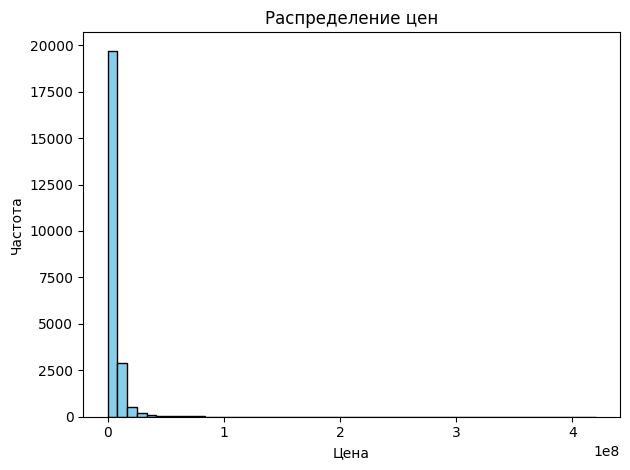

In [65]:
dataframe['last_price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен')
plt.tight_layout()
plt.show()


- Цена объекта (last_price): Распределение цен сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен находятся в диапазоне от нескольких миллионов до нескольких десятков миллионов рублей.

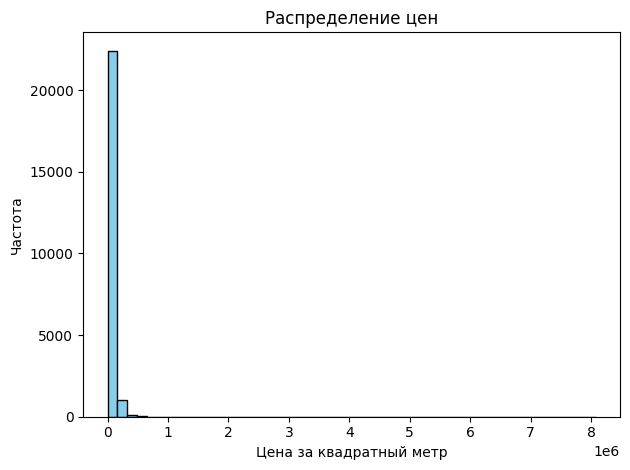

In [66]:
dataframe['price_per_meter'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.title('Распределение цен')
plt.tight_layout()
plt.show()

- Цена за квадратный метр (price_per_meter): Распределение цены за квадратный метр сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен за квадратный метр находятся в диапазоне от нескольких десятков тысяч до нескольких сотен тысяч рублей.

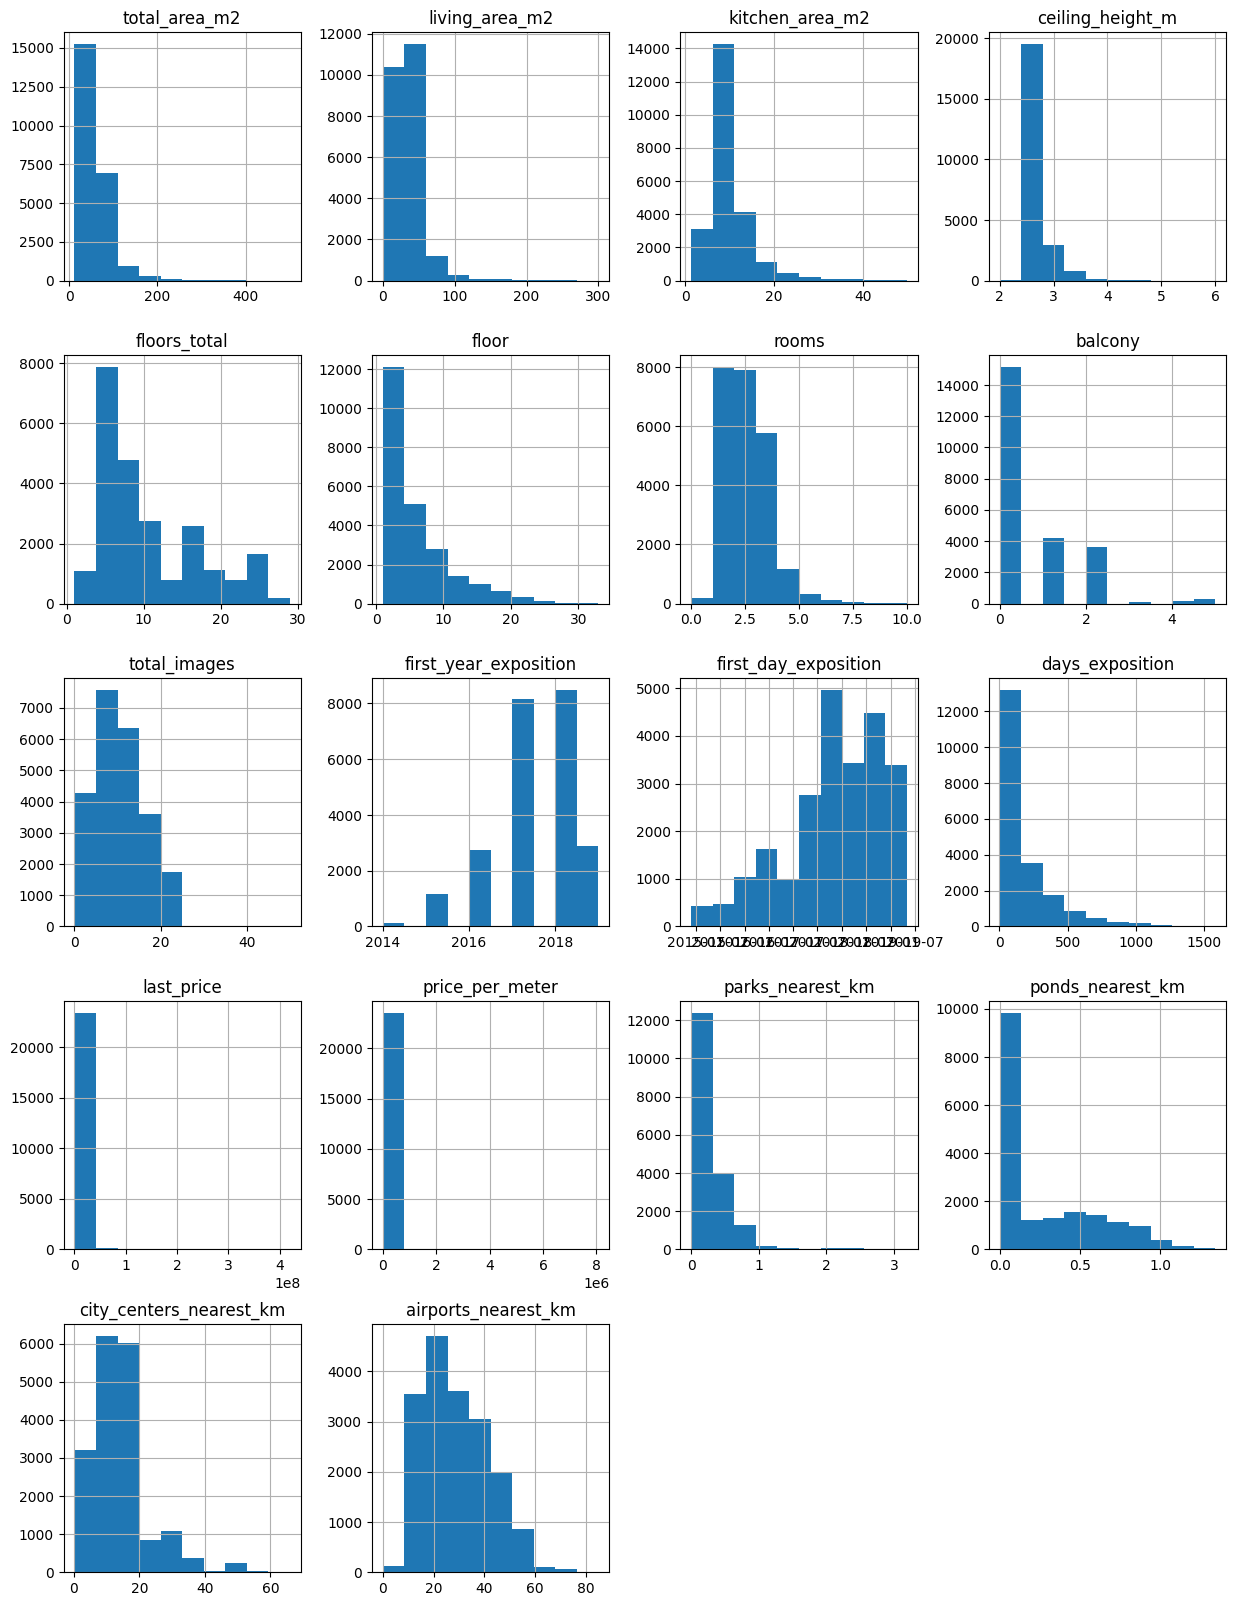

In [67]:
dataframe.hist(figsize=(15, 20))
plt.show()

# Вывод

Анализ параметров объектов

Для начала построим отдельные гистограммы для каждого из параметров и оценим распределение значений. Ниже приведены наблюдения по каждому параметру:

- Общая площадь (total_area_m2): Распределение имеет положительную скошенность (правостороннее). Большинство квартир имеют площадь до 100 квадратных метров;

- Жилая площадь (living_area_m2): Распределение также имеет положительную скошенность. Большинство квартир имеют жилую площадь до 50 квадратных метров;

- Площадь кухни (kitchen_area_m2): Распределение скошено вправо. Большинство квартир имеют площадь кухни до 20 квадратных метров;

- Высота потолков (ceiling_height_m): Распределение имеет пик около значения 2.7 метра, что, вероятно, является стандартной высотой потолков; Однако также есть некоторое количество выбросов с более высокими значениями, возможно, связанными с особенностями некоторых объектов;

- Общее количество этажей в доме (floors_total): Большинство домов имеют до 20 этажей. Наблюдается увеличение числа домов с уменьшением количества этажей; 

- Этаж квартиры (floor): Большинство квартир находятся на этажах от 1 до 8. Также имеются объявления о продаже квартир на последних этажах.
Количество комнат (rooms): Распределение показывает, что большинство квартир имеют от 1 до 3 комнат. Наблюдается уменьшение количества квартир с увеличением количества комнат;

- Количество балконов (balcony): Большинство квартир не имеют балконов или имеют только один. Есть также квартиры с большим количеством балконов;

- Количество фотографий объявления (total_images): Распределение смещено влево, что означает, что большинство объявлений имеют небольшое количество фотографий; 

- Неделя, месяц и год публикации объявления (first_week_exposition, first_month_exposition, first_year_exposition): Эти параметры позволяют оценить динамику публикации объявлений в разные периоды времени;

- Цена объекта (last_price): Распределение цен сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен находятся в диапазоне от нескольких миллионов до нескольких десятков миллионов рублей; 

- Количество дней размещения объявления (days_exposition): Распределение имеет положительную скошенность, с большинством объявлений размещенных в течение нескольких дней или недель. Однако есть также значительное количество объявлений, которые размещались в течение длительного периода времени; 
- Расстояние до ближайшего парка, водоема, центра города и аэропорта (parks_nearest_km, ponds_nearest_km, city_centers_nearest_km, airports_nearest_km): Расстояния до ближайших парков, водоемов, центров города и аэропортов имеют разнообразное распределение. Большинство объектов находятся на расстоянии до нескольких километров от этих мест.

- Цена за квадратный метр (price_per_meter): Распределение цены за квадратный метр сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен за квадратный метр находятся в диапазоне от нескольких десятков тысяч до нескольких сотен тысяч рублей.

# 4.2. Изучим как быстро продовались квартиры

In [68]:
dataframe['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

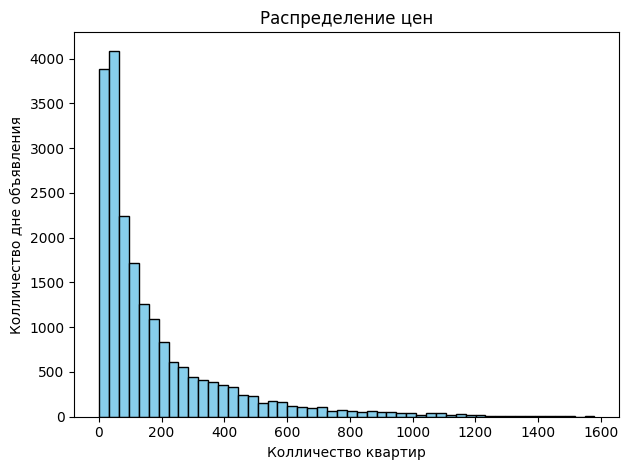

In [69]:
# dataframe['days_exposition'].hist(figsize=(5, 5))
# plt.show()
dataframe['days_exposition'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Колличество квартир')
plt.ylabel('Колличество дне объявления')
plt.title('Распределение цен')
plt.tight_layout()
plt.show()

По оси X отображатся диапазон значений столбца "days_exposition", колличество квартир, а по оси Y будет отображаться сколько дней было размещено объявление (от публикации до снятия).

# Вывод
На основе описательной статистики столбца "days_exposition" можно сделать следующие выводы:

- Среднее значение (mean) составляет примерно 180.75 дней, что может рассматриваться как средняя продолжительность продажи квартиры;

- Стандартное отклонение (std) равно примерно 219.78 дней, что указывает на значительную вариацию в продолжительности продаж;

- Медианное значение (50%) составляет 95 дней, что означает, что половина объявлений о продаже квартир была размещена на сайте менее чем на 95 дней;

- 25% квартир продаются в течение 45 дней или быстрее;

- 75% квартир продаются в течение 231 дня или дольше

Исходя из этой информации, можно сказать, что продажи, которые занимают менее 45 дней, можно считать быстрыми. Продажи, которые превышают 231 день, можно считать необычно долгими.

Однако стоит отметить, что определение "быстрых" и "долгих" продаж может зависеть от рыночных условий и региона. Поэтому рекомендуется также учитывать контекст и особенности конкретного рынка недвижимости при оценке времени продажи.

# 4.3. Изучим, зависит ли цена от следующих факторов:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

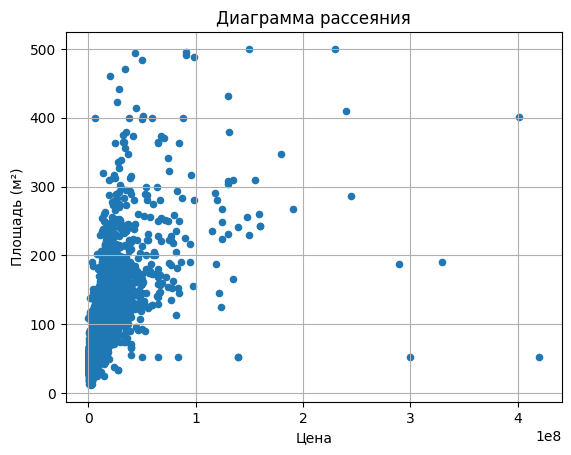

0.6339151283327603

In [70]:
dataframe.plot(x='last_price', y='total_area_m2', kind='scatter', sharex=False, grid=True)
plt.xlabel('Цена')
plt.ylabel('Площадь (м²)')
plt.title('Диаграмма рассеяния')
plt.show()
dataframe['last_price'].corr(dataframe['total_area_m2'])

- Общая площадь (total_area_m2) имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.634187). Это означает, что с увеличением общей площади квартиры вероятнее всего будет увеличиваться ее цена.

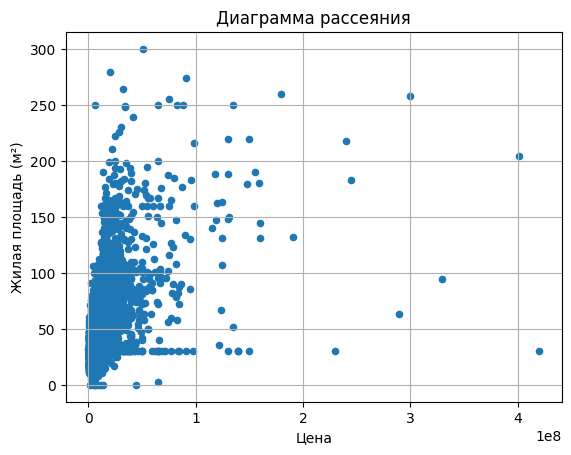

0.5296353450833278

In [71]:
dataframe.plot(x='last_price', y='living_area_m2', kind='scatter', sharex=False, grid=True)
plt.xlabel('Цена')
plt.ylabel('Жилая площадь (м²)')
plt.title('Диаграмма рассеяния')
plt.show()
dataframe['last_price'].corr(dataframe['living_area_m2'])

- Жилая площадь (living_area_m2) также имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.530331). Большая жилая площадь обычно соответствует более высокой цене.

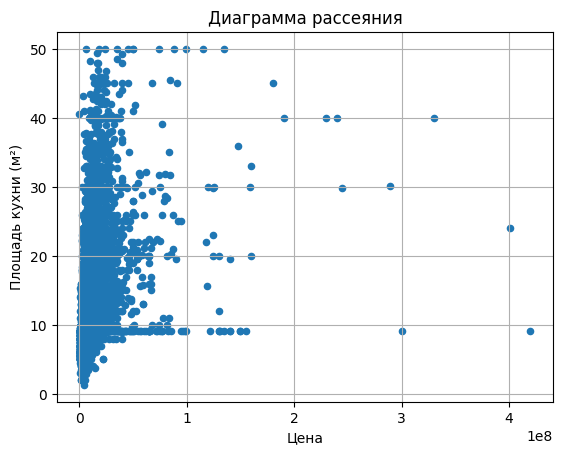

0.4037151055394945

In [72]:
dataframe.plot(x='last_price', y='kitchen_area_m2', kind='scatter', sharex=False, grid=True)
plt.xlabel('Цена')
plt.ylabel('Площадь кухни (м²)')
plt.title('Диаграмма рассеяния')
plt.show()
dataframe['last_price'].corr(dataframe['kitchen_area_m2'])

- Площадь кухни (kitchen_area_m2) имеет относительно слабую положительную корреляцию с ценой (коэффициент корреляции 0.403672). Это может указывать на то, что площадь кухни не является основным фактором, влияющим на цену.

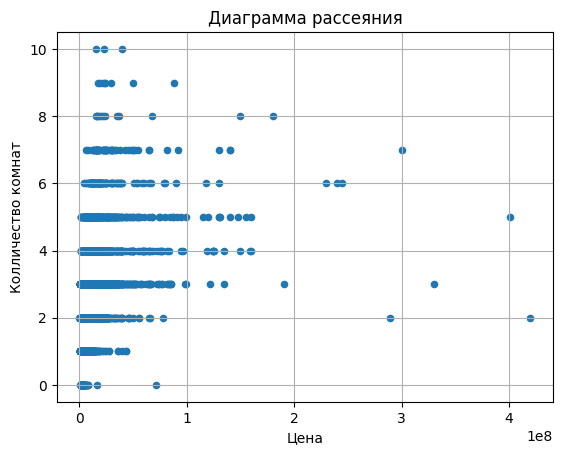

0.37408704668130566

In [73]:
dataframe.plot(x='last_price', y='rooms', kind='scatter', sharex=False, grid=True)
plt.xlabel('Цена')
plt.ylabel('Колличество комнат')
plt.title('Диаграмма рассеяния')
plt.show()
dataframe['last_price'].corr(dataframe['rooms'])

- Количество комнат (rooms) также имеет слабую положительную корреляцию с ценой (коэффициент корреляции 0.374371). Большее количество комнат обычно соответствует более высокой цене.

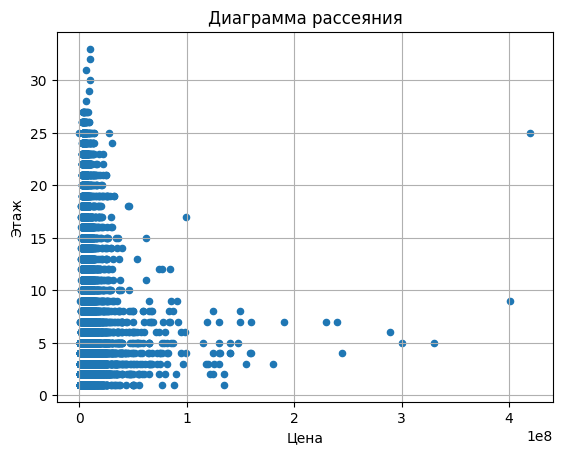

0.027294915092909496

In [74]:
dataframe.plot(x='last_price', y='floor', kind='scatter', sharex=False, grid=True)
plt.xlabel('Цена')
plt.ylabel('Этаж')
plt.title('Диаграмма рассеяния')
plt.show()
dataframe['last_price'].corr(dataframe['floor'])

- Этаж, на котором расположена квартира (floor), практически не имеет корреляции с ценой (очень слабая положительная корреляция - коэффициент корреляции 0.027235). Это может означать, что этаж не играет существенной роли в определении цены.

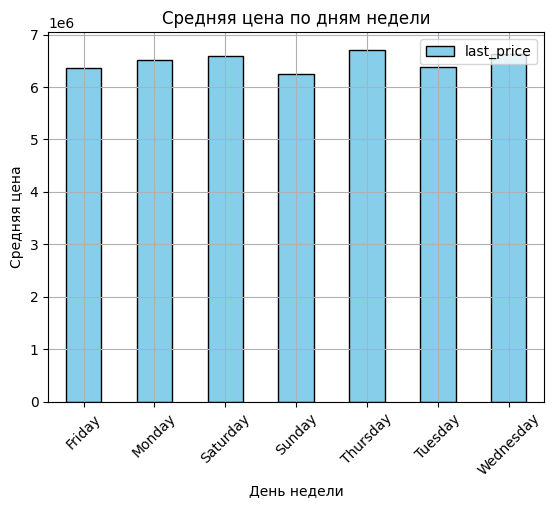

In [75]:
first_week_exposition = dataframe.pivot_table(index='first_week_exposition', values='last_price', aggfunc='mean')
first_week_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по дням недели')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

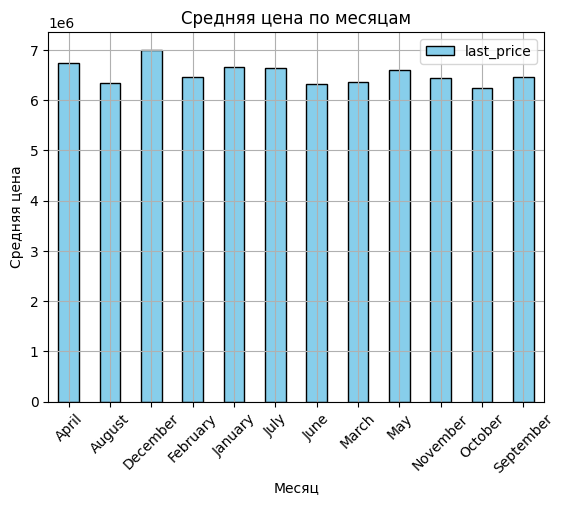

In [76]:
first_month_exposition = dataframe.pivot_table(index='first_month_exposition', values='last_price', aggfunc='mean')
first_month_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по месяцам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

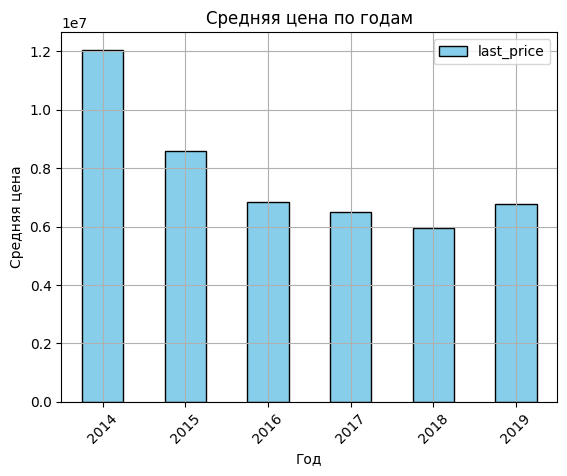

-0.04686424368263266

In [77]:
first_year_exposition = dataframe.pivot_table(index='first_year_exposition', values='last_price', aggfunc='mean')
first_year_exposition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
dataframe['last_price'].corr(dataframe['first_year_exposition'])

- Дата размещения (день недели, месяц, год) имеет очень слабую корреляцию с ценой. Все коэффициенты корреляции близки к нулю. Однако стоит отметить упадок цен на недвижимсоть начиная с 2015г. Скорее всего это связано с экономическим кризисом: В 2014-2015 годах и насыщенности рынка недвижимости.

In [78]:
# Вычисление коэффициента корреляции "last_price" от других параметров
correlation_last_price = dataframe[['last_price', 
                                    'total_area_m2', 
                                    'living_area_m2', 
                                    'kitchen_area_m2', 
                                    'rooms', 
                                    'floor', 
                                    'first_week_exposition', 
                                    'first_month_exposition', 
                                    'first_year_exposition']].corr()
correlation_last_price

/var/folders/9v/r5wxy1rs0_vf4glk1gd7ny9c0000gp/T/ipykernel_3530/4148115414.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'first_year_exposition']].corr()


,last_price,total_area_m2,living_area_m2,kitchen_area_m2,rooms,floor,first_year_exposition
last_price,1.000000,0.633915,0.529635,0.403715,0.374087,0.027295,-0.046864
total_area_m2,0.633915,1.000000,0.862537,0.534096,0.756759,-0.028377,-0.083525
living_area_m2,0.529635,0.862537,1.000000,0.375569,0.806036,-0.097251,-0.075345
kitchen_area_m2,0.403715,0.534096,0.375569,1.000000,0.240821,0.144575,-0.056000
rooms,0.374087,0.756759,0.806036,0.240821,1.000000,-0.154473,-0.054799
floor,0.027295,-0.028377,-0.097251,0.144575,-0.154473,1.000000,0.005404
first_year_exposition,-0.046864,-0.083525,-0.075345,-0.056000,-0.054799,0.005404,1.000000


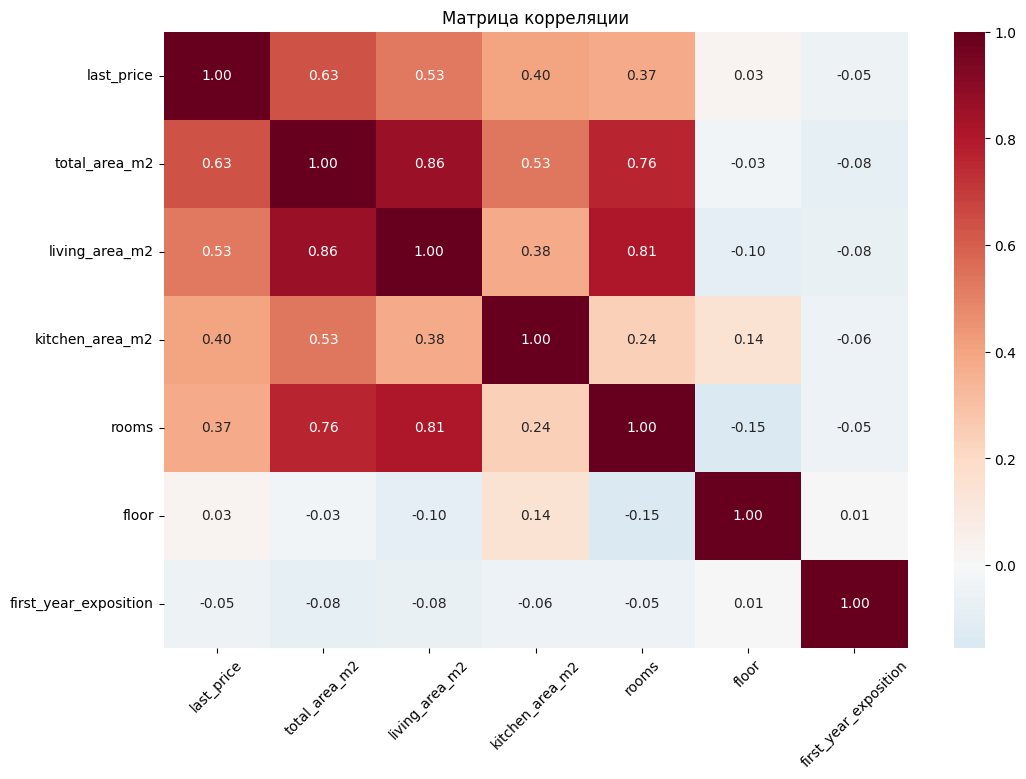

In [79]:
# Создание тепловой карты с аннотациями
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_last_price, annot=True, fmt=".2f", cmap="RdBu_r", center=0)

# Настройка внешнего вида тепловой карты
plt.title('Матрица корреляции')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Вывод

- Общая площадь (total_area_m2) имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.634187). Это означает, что с увеличением общей площади квартиры вероятнее всего будет увеличиваться ее цена;

- Жилая площадь (living_area_m2) также имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.530331). Большая жилая площадь обычно соответствует более высокой цене;

- Площадь кухни (kitchen_area_m2) имеет относительно слабую положительную корреляцию с ценой (коэффициент корреляции 0.403672). Это может указывать на то, что площадь кухни не является основным фактором, влияющим на цену;

- Количество комнат (rooms) также имеет слабую положительную корреляцию с ценой (коэффициент корреляции 0.374371). Большее количество комнат обычно соответствует более высокой цене;

- Этаж, на котором расположена квартира (floor), практически не имеет корреляции с ценой (очень слабая положительная корреляция - коэффициент корреляции 0.027235). Это может означать, что этаж не играет существенной роли в определении цены;

- Дата размещения (день недели, месяц, год) имеет очень слабую корреляцию с ценой. Все коэффициенты корреляции близки к нулю.

Таким образом, основными факторами, которые оказывают влияние на цену квартиры, являются ее общая площадь, жилая площадь, количество комнат. Эти параметры имеют более высокие коэффициенты корреляции с ценой, что указывает на их более сильную связь. Остальные параметры, такие как площадь кухни, этаж и дата размещения, имеют менее значительное влияние на цену.

# №4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [80]:
# Топ 10 населенных пунктов с наибольшим числом объявлений
(dataframe['locality_name'].value_counts() / dataframe.shape[0] * 100).head(10)

санкт-петербург      66.416295
поселок мурино        2.342457
поселок шушары        1.862932
всеволожск            1.688945
пушкин                1.565882
колпино               1.434331
поселок парголово     1.387651
гатчина               1.302780
деревня кудрово       1.268831
выборг                1.005729
Name: locality_name, dtype: float64

In [81]:
# Выберим топ 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = dataframe['locality_name'].value_counts().head(10).index.tolist()

# Создаем пустой словарь для хранения данных
average_price_per_sqm = {}

# Рассчитаем медиану одного квадратного метра для каждого населенного пункта
for locality in top_10_localities:
    subset = dataframe[dataframe['locality_name'] == locality]
    average_price = subset['last_price'].sum() / subset['total_area_m2'].median()
    average_price_per_sqm[locality] = average_price

# Создаем DataFrame из полученных данных
result = pd.DataFrame.from_dict(average_price_per_sqm, orient='index', columns=['average_price_per_sqm']).sort_values('average_price_per_sqm', ascending=False)

# Выведим результат
result


,average_price_per_sqm
санкт-петербург,2.281222e+09
поселок мурино,5.394099e+07
пушкин,4.486982e+07
поселок шушары,3.594036e+07
поселок парголово,3.413024e+07
деревня кудрово,3.172965e+07
всеволожск,2.816151e+07
колпино,2.679678e+07
гатчина,2.379821e+07
выборг,1.534827e+07


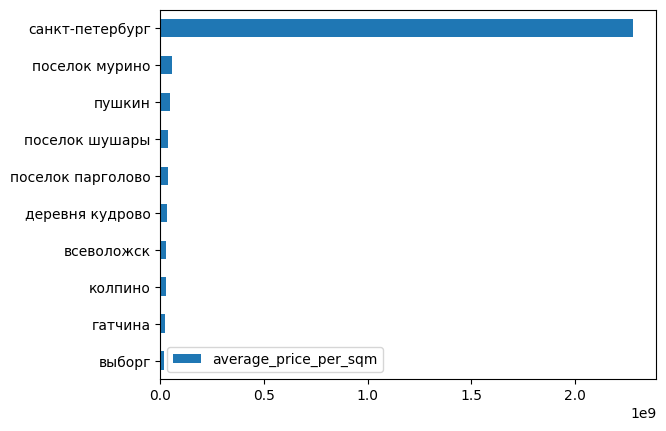

In [82]:
result.sort_values('average_price_per_sqm', ascending=True).plot(kind='barh')
plt.show()

## Вывод
Цены на недвижимость зависят от местоположения и размера населенного пункта. Очевидно, что в Питере, как в культурной столице, цены наиболее высокие, а в более удаленных и маленьких городках цены ниже.

# Найдем Топ 10 населенных пунктов с самой высокой/низкой ценой за квадратный метр

In [83]:
# Создание нового DataFrame с необходимыми столбцами
price_per_meter_df = dataframe[['locality_name', 'price_per_meter']].copy()

# Группировка данных по населенным пунктам и вычисление средней цены за квадратный метр
grouped_prices = price_per_meter_df.groupby('locality_name')['price_per_meter'].mean().reset_index()

# Выделение топ 10 населенных пунктов с самой высокой ценой за квадратный метр
top_high_price_localities = grouped_prices.sort_values(by='price_per_meter', ascending=False).head(10)

# Выделение топ 10 населенных пунктов с самой низкой ценой за квадратный метр
top_low_price_localities = grouped_prices.sort_values(by='price_per_meter').head(10)

# Вывод результатов
print("Топ 10 населенных пунктов с самой высокой ценой за квадратный метр:")
print(top_high_price_localities)

print("\nТоп 10 населенных пунктов с самой низкой ценой за квадратный метр:")
print(top_low_price_localities)




Топ 10 населенных пунктов с самой высокой ценой за квадратный метр:
         locality_name  price_per_meter
311    санкт-петербург    116108.300210
126        зеленогорск    115122.799583
261     поселок репино    104238.612500
305             пушкин    103125.819377
323         сестрорецк    101757.616831
225  поселок лисий нос    100660.816667
139            кудрово    100134.543626
74   деревня мистолово     98549.977273
222   поселок левашово     96997.690000
144             мурино     92722.708824

Топ 10 населенных пунктов с самой низкой ценой за квадратный метр:
               locality_name  price_per_meter
103       деревня старополье        11206.220
281    поселок станции свирь        11481.480
34      деревня вахнова кара        11688.310
35          деревня выскатка        12335.480
274        поселок совхозный        12629.130
67   деревня малая романовка        12724.550
290         поселок тесово-4        12931.030
98             деревня сижно        13709.680
125       

# №4.5. Вычислим среднюю цену каждого километра до центра, квартир в Санкт-Петербург

In [84]:
# Фильтрация квартир в Санкт-Петербурге
spb_data = dataframe.loc[dataframe['locality_name'] == 'санкт-петербург'].copy()

# Округление значений удаленности до центра до целых километров
spb_data['km_to_center'] = np.ceil(spb_data['city_centers_nearest_km']).astype('Int64')

# Рассчет цены каждого километра
spb_data['price_per_km'] = spb_data['last_price'] / spb_data['km_to_center']

# Группировка и расчет медианы и средней цены для каждого километра
price_per_km_stats = spb_data.groupby('km_to_center')['price_per_km'].agg(['mean', 'median']).round()

# Вывод результатов
price_per_km_stats

,mean,median
km_to_center,,
1,23442315.0,11750000.0
2,9425426.0,5417500.0
3,5387771.0,3166667.0
4,3002301.0,2125000.0
5,2717218.0,1980000.0
6,2550880.0,1485022.0
7,2055587.0,1143571.0
8,1599709.0,937500.0
9,936756.0,722222.0


In [85]:
correlation = dataframe[['last_price', 'city_centers_nearest_km']].corr()
correlation

,last_price,city_centers_nearest_km
last_price,1.000000,-0.228038
city_centers_nearest_km,-0.228038,1.000000


В целом, анализ указывает на тенденцию снижения стоимости объектов с увеличением расстояния до центра города. 

# Этап 5. Общий вывод

В ходе выполнения проекта были обнаружены следующие инсайты и выводы на основе предоставленных данных:

1) Анализ параметров объектов:

- Общая площадь (total_area_m2): Большинство квартир имеют площадь до 100 квадратных метров;
- Жилая площадь (living_area_m2): Большинство квартир имеют жилую площадь до 50 квадратных метров;
- Площадь кухни (kitchen_area_m2): Большинство квартир имеют площадь кухни до 20 квадратных метров;
- Высота потолков (ceiling_height_m): Большинство объектов имеют стандартную высоту потолков около 2.7 метра;
- Количество этажей в доме (floors_total): Большинство домов имеют до 20 этажей;
- Этаж квартиры (floor): Большинство квартир находятся на этажах от 1 до 8;
- Количество комнат (rooms): Большинство квартир имеют от 1 до 3 комнат;
- Количество балконов (balcony): Большинство квартир не имеют балконов или имеют только один;
- Количество фотографий объявления (total_images): Большинство объявлений имеют небольшое количество фотографий;
- Дата публикации объявления (first_week_exposition, first_month_exposition, first_year_exposition): Позволяют оценить динамику публикации объявлений в разные периоды времени;
- Цена объекта (last_price): Большинство цен находятся в диапазоне от нескольких миллионов до нескольких десятков миллионов рублей;
- Количество дней размещения объявления (days_exposition): Большинство объявлений размещаются в течение нескольких дней или недель, но есть и долгосрочные объявления.

2) Средняя продолжительность продажи квартиры составляет примерно 180.75 дней, со стандартным отклонением около 219.78 дней. Медианное значение равно 95 дням.

3) Влияние параметров на цену квартиры:

- Общая площадь (total_area_m2) имеет сильную положительную корреляцию с ценой (коэфффициент корреляции 0.634187). Это означает, что с увеличением общей площади квартиры вероятнее всего будет увеличиваться ее цена;
- Жилая площадь (living_area_m2) также имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.530331). Большая жилая площадь обычно соответствует более высокой цене;
- Площадь кухни (kitchen_area_m2) имеет относительно слабую положительную корреляцию с ценой (коэффициент корреляции 0.403672). Это может указывать на то, что площадь кухни не является основным фактором, влияющим на цену;
- Количество комнат (rooms) также имеет слабую положительную корреляцию с ценой (коэффициент корреляции 0.374371). Большее количество комнат обычно соответствует более высокой цене;
- Этаж, на котором расположена квартира (floor), практически не имеет корреляции с ценой (очень слабая положительная корреляция - коэффициент корреляции 0.027235). Это может означать, что этаж не играет существенной роли в определении цены;
- Дата размещения объявления (день недели, месяц, год) имеет очень слабую корреляцию с ценой. Все коэффициенты корреляции близки к нулю.

4) Местоположение и размер населенного пункта оказывают влияние на цены недвижимости. Цены на недвижимость в Петербурге, как в культурной столице, наиболее высокие, в то время как в удаленных и маленьких городах цены ниже.

5) Рекомендации для улучшения площадки объявлений:

- Обеспечить надежность данных и валидацию на сервере для предотвращения появления отсутствующих значений и обеспечения качества данных;
- Автоматизировать сбор информации о близости к паркам, водоемам и аэропортам, а также информацию о сериях домов, чтобы упростить заполнение информации о квартирах;
- Улучшить представление данных, для расчета расстояний и предоставить пользователю более наглядную информацию о расстоянии до объектов;
- Рекомендуется предупреждать пользователей о возможных некорректных значениях и предоставлять референсные данные, например, о ценах на квартиры в их жилом доме, для помощи в определении правильной цены.

6) При анализе данных были выявлены проблемы, которые требуют внимания:

- Отсутствие значений в некоторых столбцах, таких как высота потолков и расстояние до ближайшего парка. Необходимо обратить внимание на заполнение всех необходимых полей при размещении объявлений;
- Обнаружены некорректные значения, например, нулевые значения в столбце с количеством комнат или аномально высокие значения цены;
- Рекомендуется проводить дополнительную проверку и фильтрацию данных, чтобы исключить ошибки или выбросы.

7) В ходе исследования были определены типичные характеристики продажи квартир:

- Средняя продолжительность продажи составляет примерно 180.75 дней, а медианное значение - 95 дней. Это может служить ориентиром для определения быстрых и долгих продаж;
- Квартиры, которые продаются в течение 45 дней или быстрее, можно считать быстрыми продажами, в то время как продажи, превышающие 231 день, могут считаться необычно долгими;
- Однако следует учитывать, что определение быстрых и долгих продаж может зависеть от рыночных условий и региона. Рекомендуется принимать во внимание контекст и особенности конкретного рынка недвижимости при оценке времени продажи.